In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_CV/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Detector systematic: CV

In [4]:
# Load input files
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_detsys_CV.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_CV_all.root'

tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     7.644e+18 # 8.649e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0  #E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	96450
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.19653398031e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.19653398031e+20  Scale:  0.0638845208392
Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0638845208392
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out4.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	96446
Overlay: Number of Entries:	96446
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
#flux = 1.16859e11/1.592e20 # flux per POT per cm2
flux = 7.3789785277e-10
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


weight_name = 'EventWeight*TunedCentralValue_Genie'


In [11]:
# Load the global variables for access of functions
#NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

In [12]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [13]:
print numu_signal

fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5


In [14]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
#print dirt_out.GetEntries(cut)
#print dirt_out.GetEntries(cut)*scale_out[dirt_out]

#print overlay_out.GetEntries("!((Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50)) && (MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50)) && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5)")
print overlay_out.GetEntries('!(numu_signal)')

cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'


80178


In [15]:
# calculate total flux integrated cross section:

N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+' && numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries(numu_true)*scale_out[overlay_out]
#print N_dirt, N_overlay
N_overlay_detsys = detsys_out.GetEntries(cut+'&& !numu_signal')*scale_out[detsys_out]
N_signal_detsys = detsys_out.GetEntries(cut+'&& numu_signal')*scale_out[detsys_out]
N_true_detsys = detsys_out.GetEntries('numu_true')*scale_out[detsys_out]
 
h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]
overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()
#print h_weight_func.Integral(0,10001)*scale_out[overlay_out]

h_weight_func2 = ROOT.TH1F("h_weight_func2",'h_weight_func',10000,0,1000)
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && numu_signal','0') # weights for signal definition
detsys_signal = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2',cut+' && !numu_signal','0') # weights for signal definition
detsys_pass_weight = h_weight_func2.GetMean()
detsys_out.Draw(weight_name+'>>h_weight_func2','numu_true','0') # weights for signal definition
detsys_true_weight = h_weight_func2.GetMean()

print 'Weights for CV', overlay_signal, overlay_pass_weight, overlay_true_weight
print 'Weights for detsys', detsys_signal, detsys_pass_weight, detsys_true_weight

N_dirt = N_dirt*dirt_pass_weight

N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight

N_overlay_detsys = N_overlay_detsys*detsys_pass_weight
N_signal_detsys = N_signal_detsys*detsys_signal
N_true_detsys = N_true_detsys*detsys_true_weight

eff = N_signal/(N_true+1e-80)
eff_detsys = N_signal_detsys/(N_true_detsys+1e-80)

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Total integrated cross section:', sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC

sigma_tot_detsys = (N_data- (N_ext+N_dirt+N_overlay_detsys))/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay_detsys
print 'Number of overlay signal:', N_signal_detsys
print 'Total integrated cross section:', sigma_tot_detsys
sigma_tot_MC_detsys = (N_signal_detsys)/(eff_detsys*beam_flux*N_tot+1e-80)
print 'Total integrated cross section for MC:', sigma_tot_MC_detsys

Weights for CV 1.17342719546 1.1166576973 1.21136549457
Weights for detsys 1.17342719546 1.1166576973 1.21136549457
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372
Total integrated cross section: 8.10645459826e-39
Total integrated cross section for MC: 8.09127367715e-39
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 201.313414536
Number of overlay signal: 970.556760372
Total integrated cross section: 8.10645459826e-39
Total integrated cross section for MC: 8.09127367715e-39


In [16]:
print eff,N_signal,(N_true+0.000001)
print eff,N_signal/scale_out[overlay_out],(N_true+0.000001)/scale_out[overlay_out]
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'Scaling: ', scale_out[detsys_out],scale_out[overlay_out],scale_out[dirt_out],scale_out[ext_out],scale_out[data_out]

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


0.518265952699 970.556760372 1872.7002147
0.518265952699 15192.3618996 29313.8336188
0.518265952699 970.556760372 1872.7002147
Scaling:  0.0638845208392 0.0638845208392 0.0611423668132 0.0967862715198 1.0
xsec percent diff MC:  0.0
xsec percent diff:  0.0


In [17]:
def make_mc_hist(cut,variable,xtitle,xstart,xend,xbins,name):
    weight_name = 'EventWeight*TunedCentralValue_Genie'
    h_bgk = ROOT.TH1F("h_bgk",'h_bgk',xbins,xstart,xend)
    detsys_out.Draw(variable+'>>h_bgk',weight_name+'*('+cut+')','')
    h_bgk.SetXTitle(xtitle)
    h_bgk.SetYTitle("Entries per bin")
    h_bgk.Scale(scale[overlay])
    h_bgk.Draw("")
    h_bgk.Write(name)
    return

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'

make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,2.5,20,'TrackMom_MCS'+name)
make_mc_hist(cut_bkg,'TrackMomRange_mu','Muon momentum range [GeV]',0,2.5,20,'TrackMom_range'+name) 
make_mc_hist(cut_bkg,'Nu_Vx_sce','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vy_sce','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name) 
make_mc_hist(cut_bkg,'Nu_Vz_sce','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name) 
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,20,'cosTheta'+name) 
make_mc_hist(cut_bkg,'TrackLength','Track length [cm]',0,300,60,'TrackLength'+name) 
make_mc_hist(cut_bkg,'TrackPID_chiproton','Proton chi2',0,200,20,'PID_chiproton'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chipion','TrackPID_chimuon/TrackPID_chipion',0.4,1.2,20,'PIDmupion_ration'+name) 
make_mc_hist(cut_bkg,'TrackPID_chimuon/TrackPID_chiproton','TrackPID_chimuon/TrackPID_chiproton',0,0.25,25,'PIDmuprot_ration'+name) 
make_mc_hist(cut_bkg,'nr_crthit_top','Nr CRTHits in Top',0,4,4,'nr_crthit_top'+name) 
make_mc_hist(cut_bkg,'crthit_vertex_zcut','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name) 
make_mc_hist(cut_bkg,'TrackScore','TrackScore',0.5,1,20,'TrackScore'+name) 
make_mc_hist(cut_bkg,'NuScore','Muon momentum [GeV]',0,1,20,'NuScore'+name) 
#make_mc_hist(cut_bkg,'TrackMomMCS_mom','Topological Score',0,2.5,20,'NuScore'+name) 





In [18]:
cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && !numu_signal'
name = '_bkg_all2'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
name = '_sig_all'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && !numu_signal'
name = '_bkg_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 

cut_bkg = 'fidVol && muon && numu_signal'
name = '_sig_pre'
make_mc_hist(cut_bkg,'TrackMomMCS_mom','Muon momentum MCS [GeV]',0,3,60,'TrackMom_MCS_fine'+name)
make_mc_hist(cut_bkg,'cos(TrackTheta)','cos(Theta)',-1,1,60,'cosTheta_fine'+name) 


In [19]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

785

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_eff_trueMom.pdf has been created


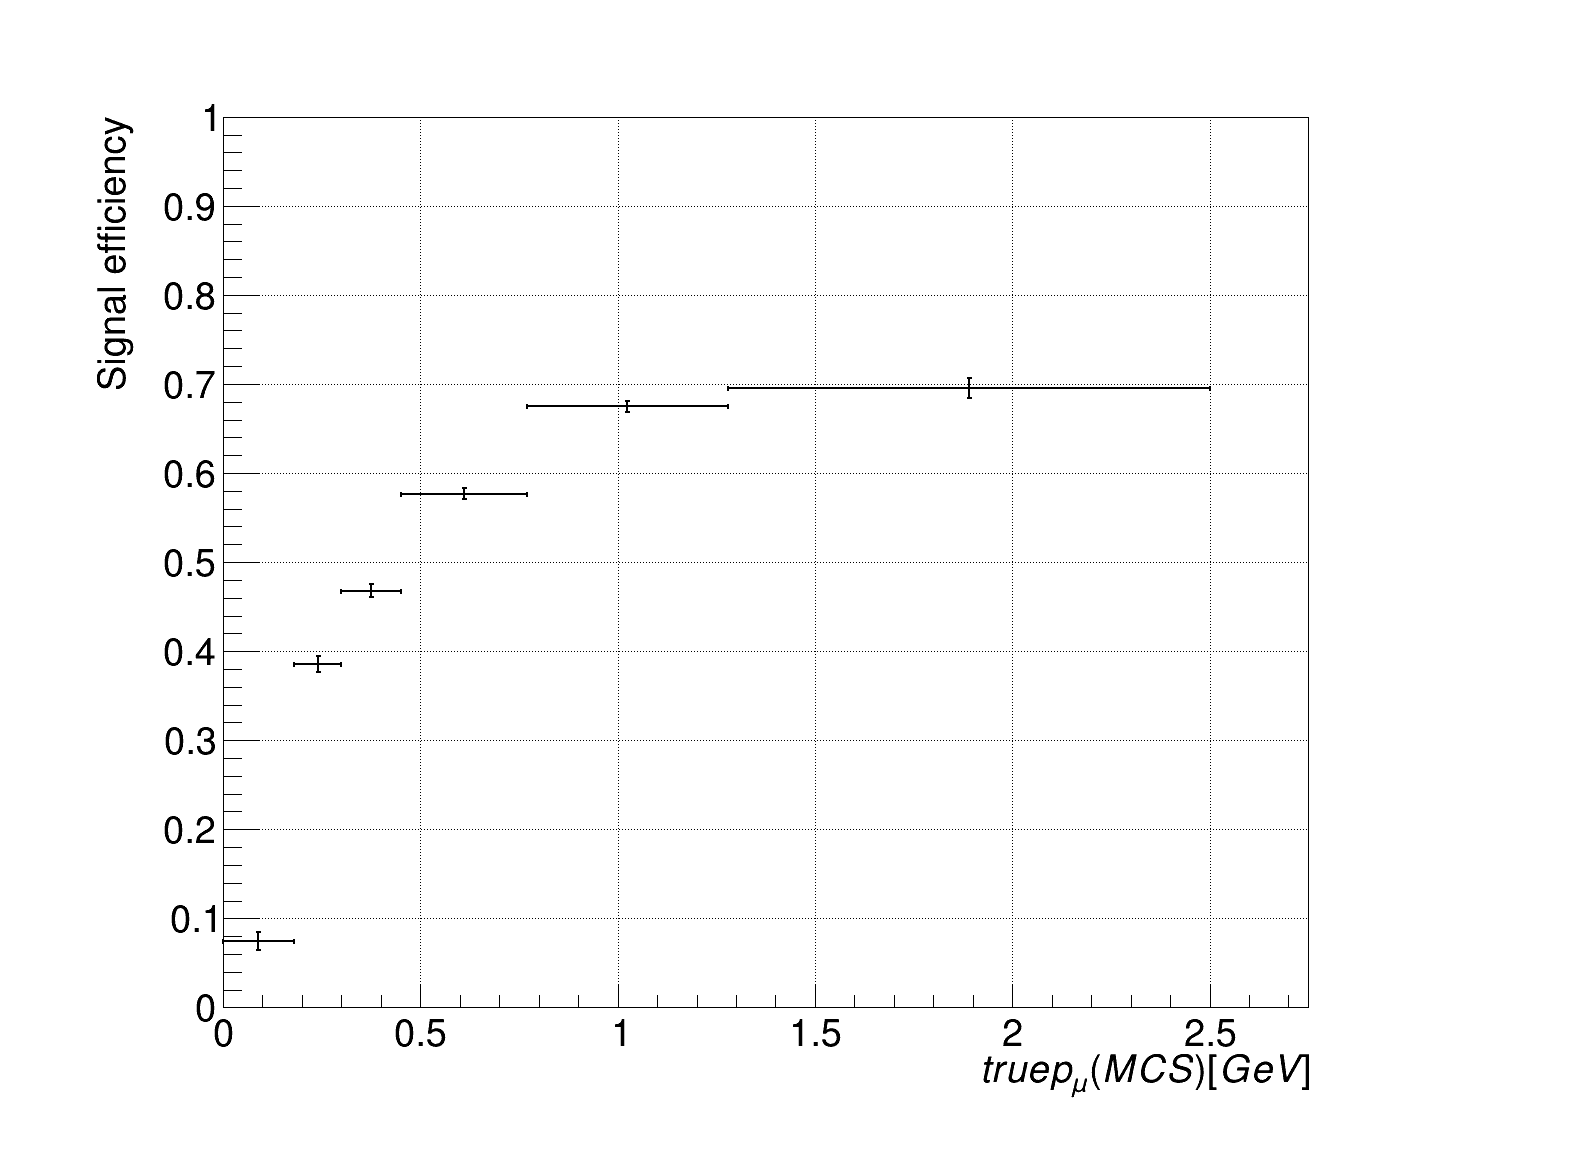

In [20]:

weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("true p_{\mu} (MCS) [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")

66309

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h2_true_MCS.pdf has been created


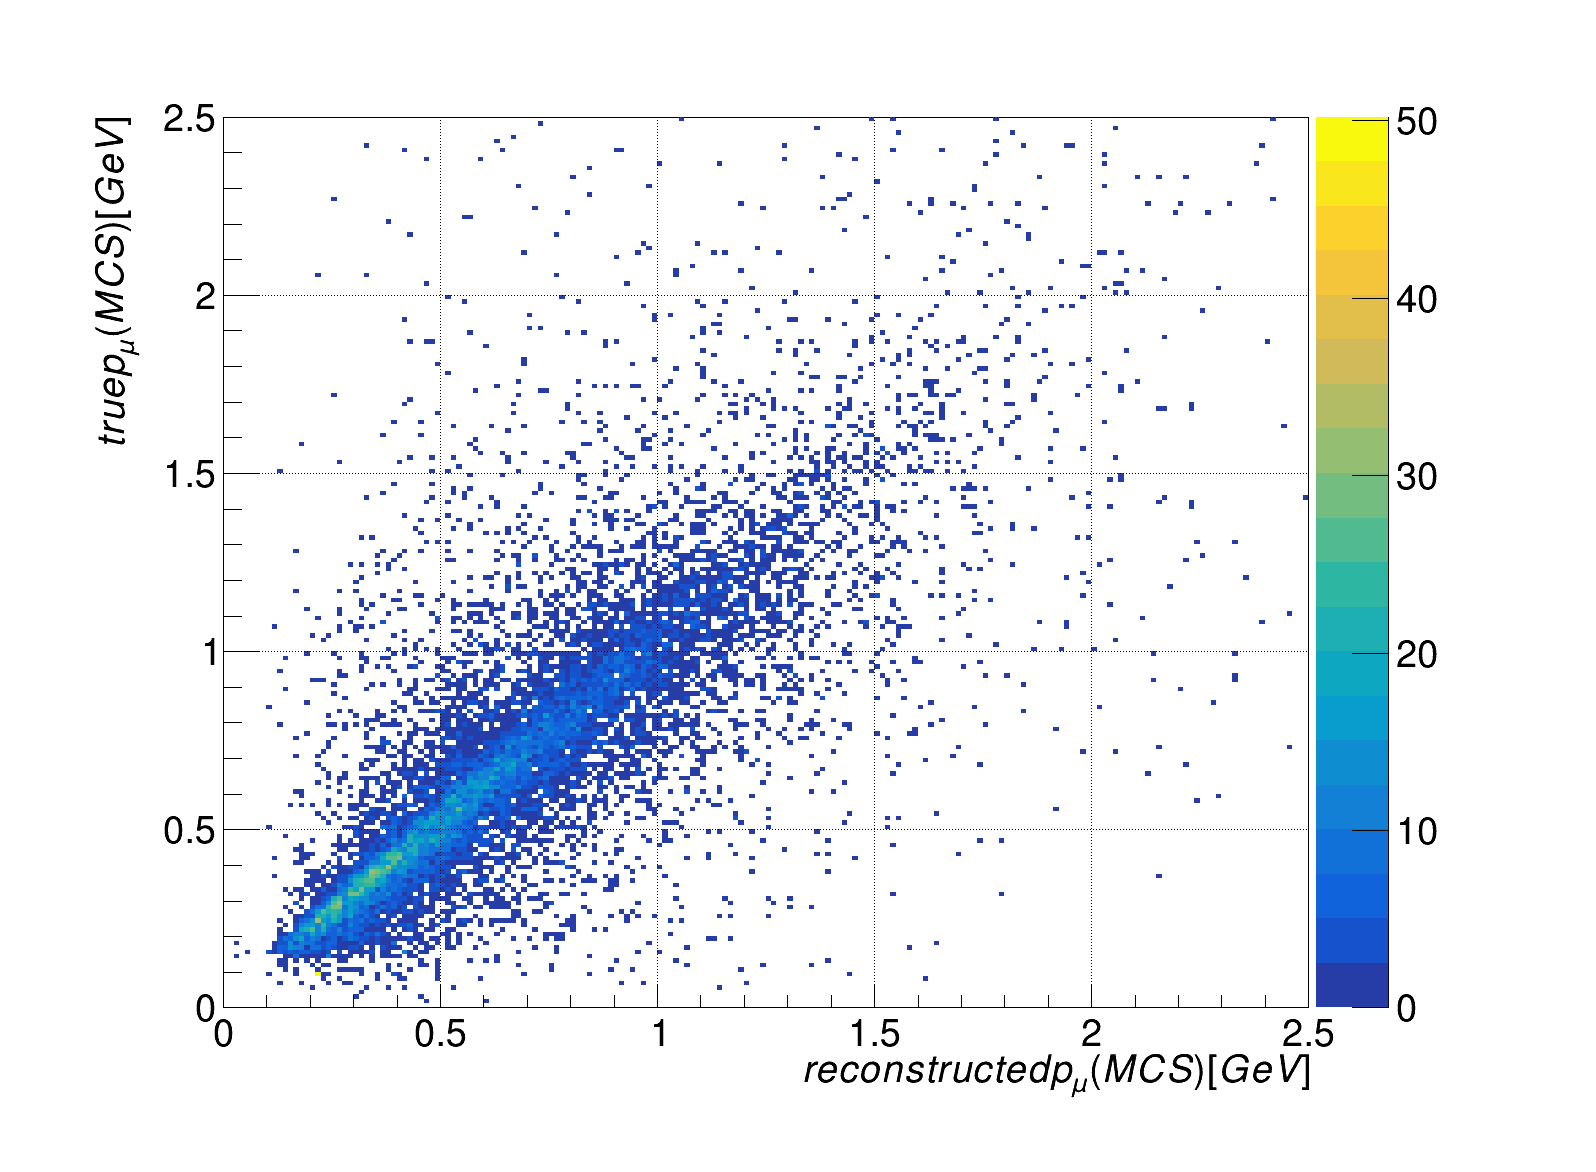

In [21]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS.root")
c1.SaveAs(outputdir_png + "h2_true_MCS.png")
c1.SaveAs(outputdir_pdf + "h2_true_MCS.pdf")

h_migration.Write("h2_true_MCS_fine")

1146

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h2_true_MCS_bin.pdf has been created


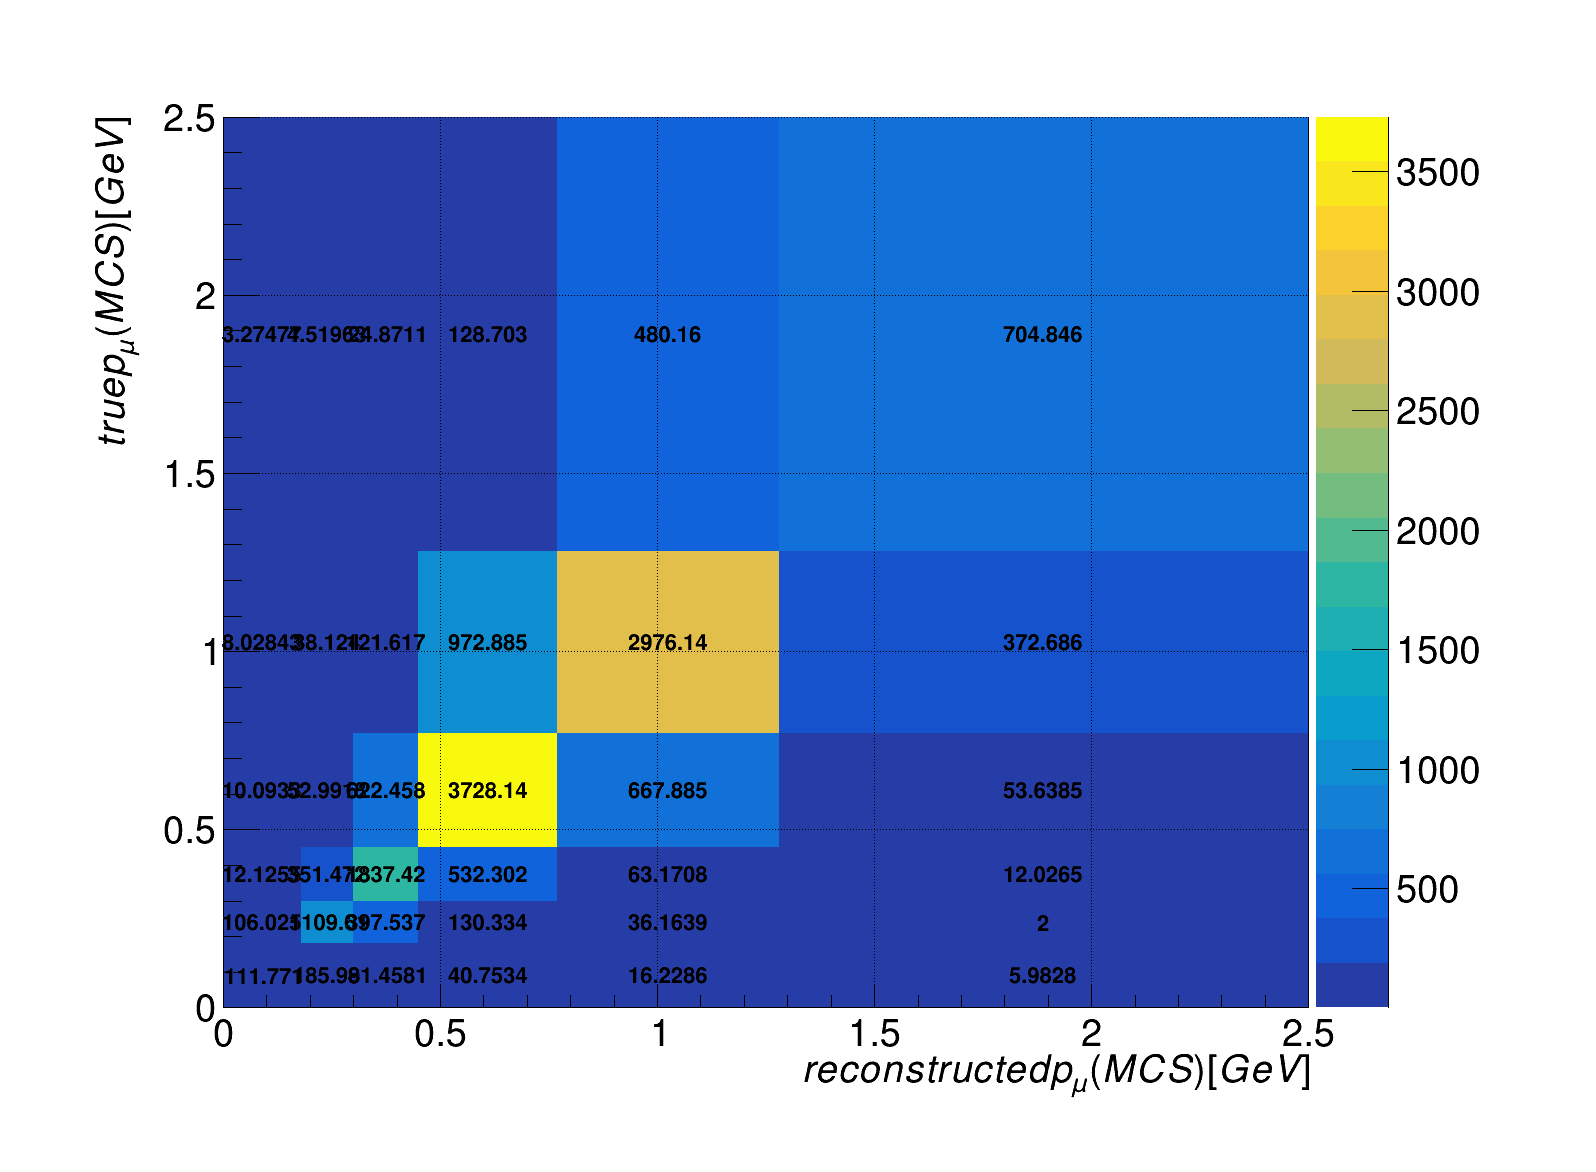

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&&numu_true)','')
h_migration.SetXTitle("reconstructed p_{\mu} (MCS) [GeV]")
h_migration.SetYTitle("true p_{\mu} (MCS) [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

[[0.2527695  0.05950887 0.00431363 0.00195946 0.00178373 0.00239487]
 [0.42061763 0.62279155 0.12503569 0.01028754 0.00847029 0.00330526]
 [0.18421778 0.22312649 0.65365926 0.12084063 0.02702044 0.01818851]
 [0.09216398 0.07315272 0.18936587 0.72376196 0.21615292 0.09412211]
 [0.03670099 0.02029782 0.02247293 0.1296596  0.66122957 0.35114608]
 [0.01353013 0.00112254 0.00427841 0.01041309 0.08280242 0.51546137]
 [0.         0.         0.00087421 0.00307773 0.00254063 0.0153818 ]]


652

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_mitigation_matrix.pdf has been created


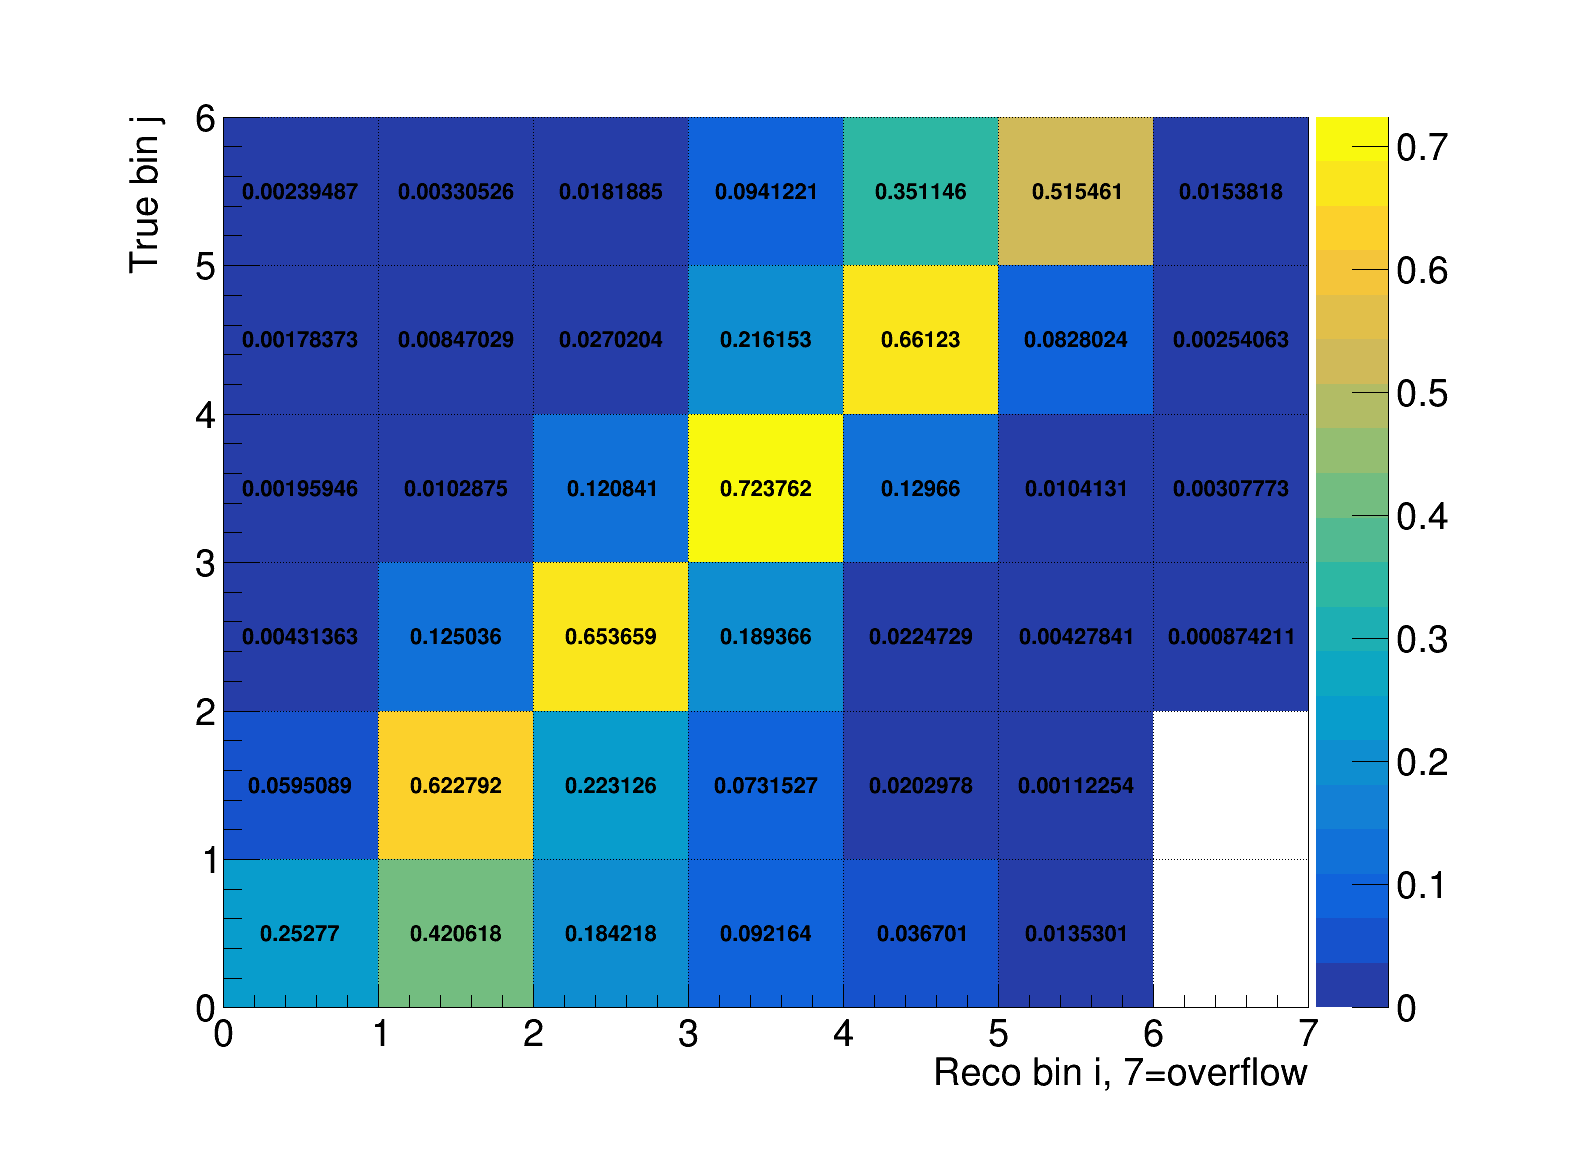

In [23]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))

for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
        
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [24]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

489

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [25]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
Err_sel = np.zeros((6))
Err_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((6))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)


192.44448852539062 2567.335693359375 0.07495883340194433
1479.1192626953125 3834.984375 0.38569107930076313
2564.586181640625 5481.36328125 0.4678737843217322
4967.30859375 8610.451171875 0.5768929519018834
4407.82373046875 6532.05859375 0.6747985596280843
1345.5712890625 1934.7884521484375 0.695461711882942
[0.18046316 0.32892657 0.45194412 0.5634896  0.64363299 0.66586283
 0.63653423]
[0.13044866 0.29079945 0.48527962 0.65204187 0.74682032 0.76282716
 0.80691716]


In [26]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.010004738236083902
0.009339200735261781
0.007531365365024751
0.005865732916157527
0.0063108497403293355
0.011306454596135504
[0.00316697 0.0111174  0.00993481 0.00970514 0.00962969 0.00658975
 0.00021458]


466

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_eff_tilde_xsecMom.pdf has been created


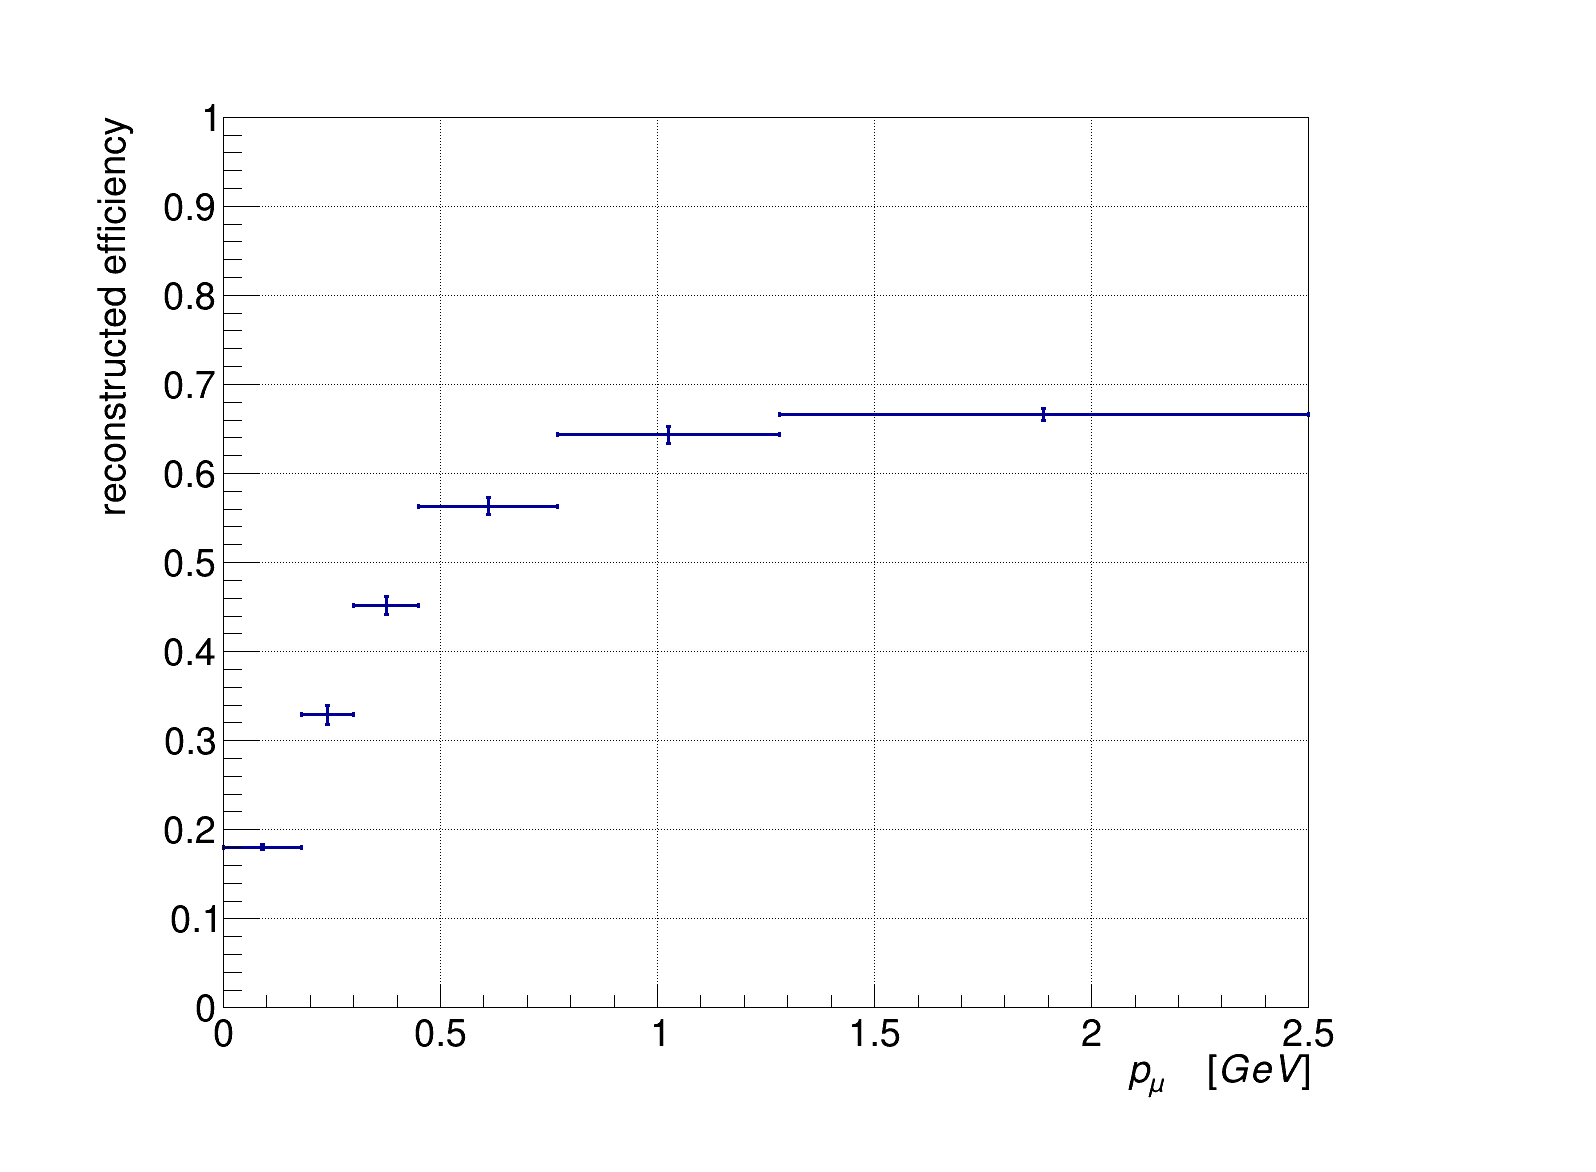

In [27]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.SetXTitle("p_{\mu} \quad [GeV]")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(outputdir_pdf + "h_eff_tilde_xsecMom.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [28]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2822L

In [29]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

439

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [30]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

200.500880241
969.613877296


In [31]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [32]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [33]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

5.38479274986e-39
7.78676185536e-38
8.6375070161e-38
3.08814046156e-38
5.89348777156e-39
1.43484919145e-40


421

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_xsec_corr.root has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_xsec_corr.root has been created


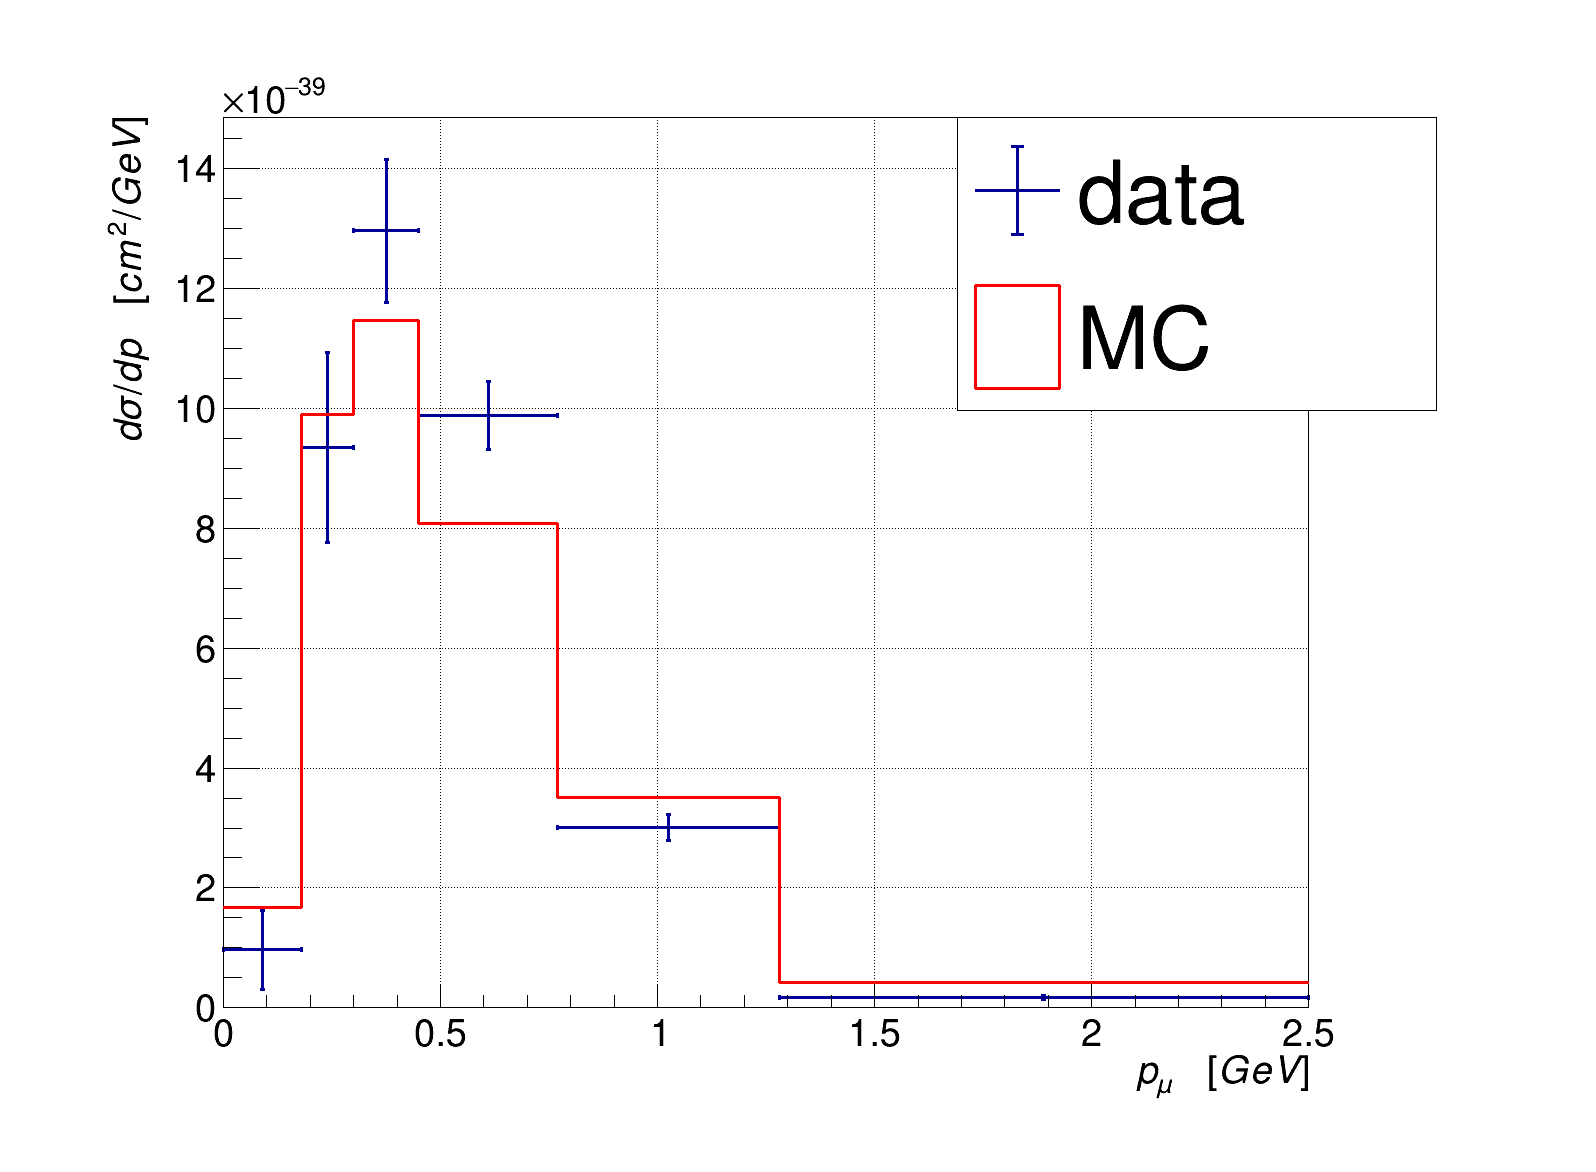

In [34]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \t [cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr.png")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")
c1.SaveAs(outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

# Now in bins of Theta

In [35]:
from array import array
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

855

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_eff_

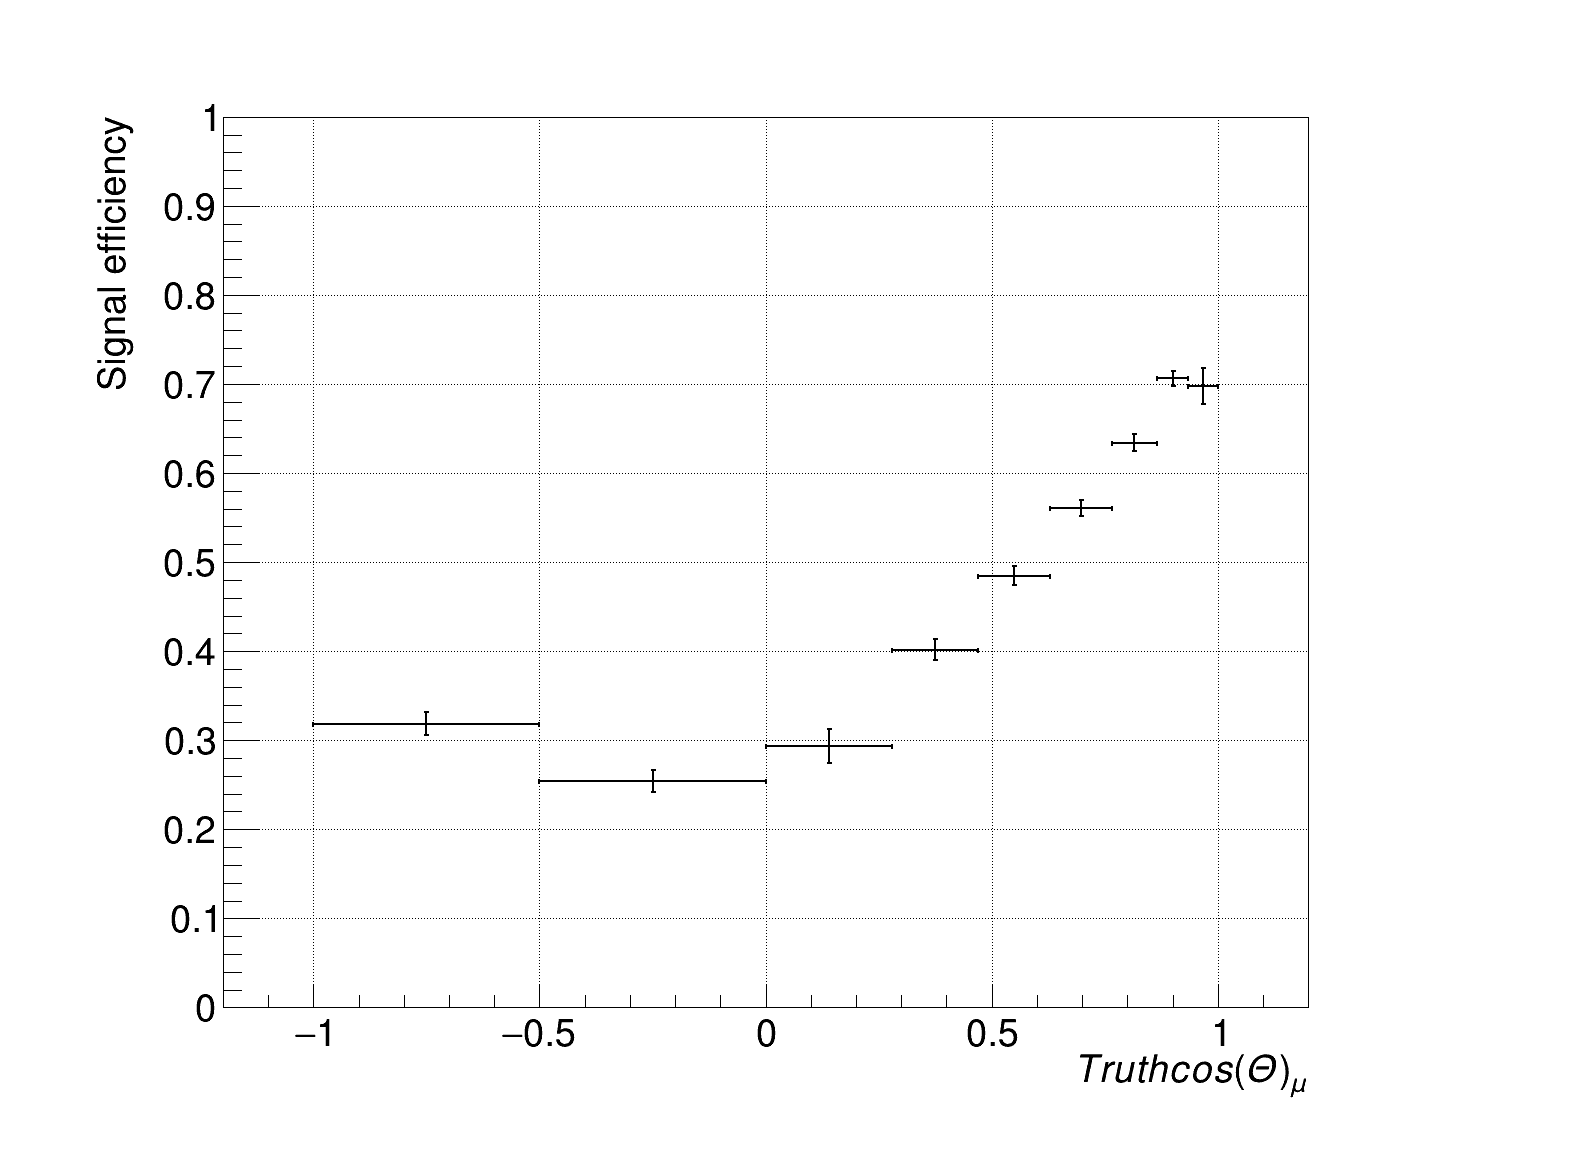

In [36]:
# calculate true theta
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth cos(\Theta)_{\mu}")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true_theta")

42842

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h2_true_Theta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h2_true_Theta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h2_true_Theta.pdf has been created


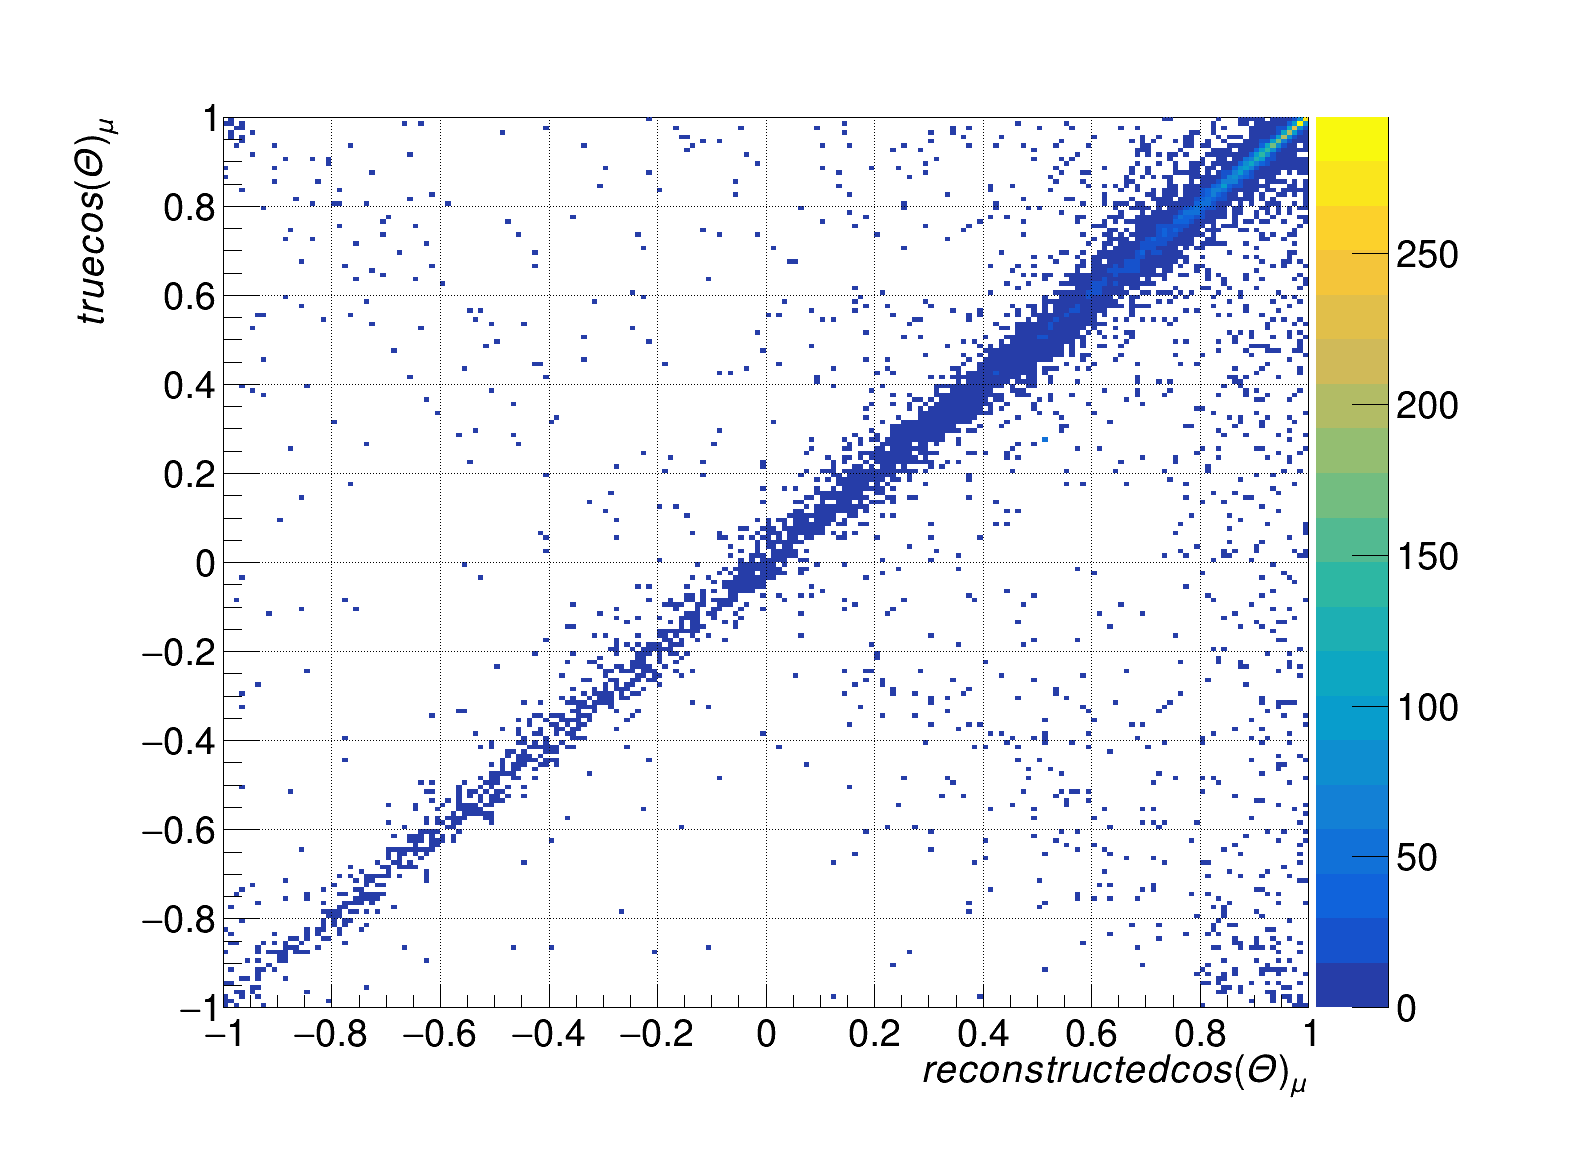

In [37]:
# plot fine binned reco true
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reconstructed cos(\Theta)_{\mu}")
h_migration.SetYTitle("true cos(\Theta)_{\mu}")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta.root")
c1.SaveAs(outputdir_png + "h2_true_Theta.png")
c1.SaveAs(outputdir_pdf + "h2_true_Theta.pdf")

h_migration.Write("h2_true_theta_fine")

1566

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h2_true_Theta_bin.pdf has been created


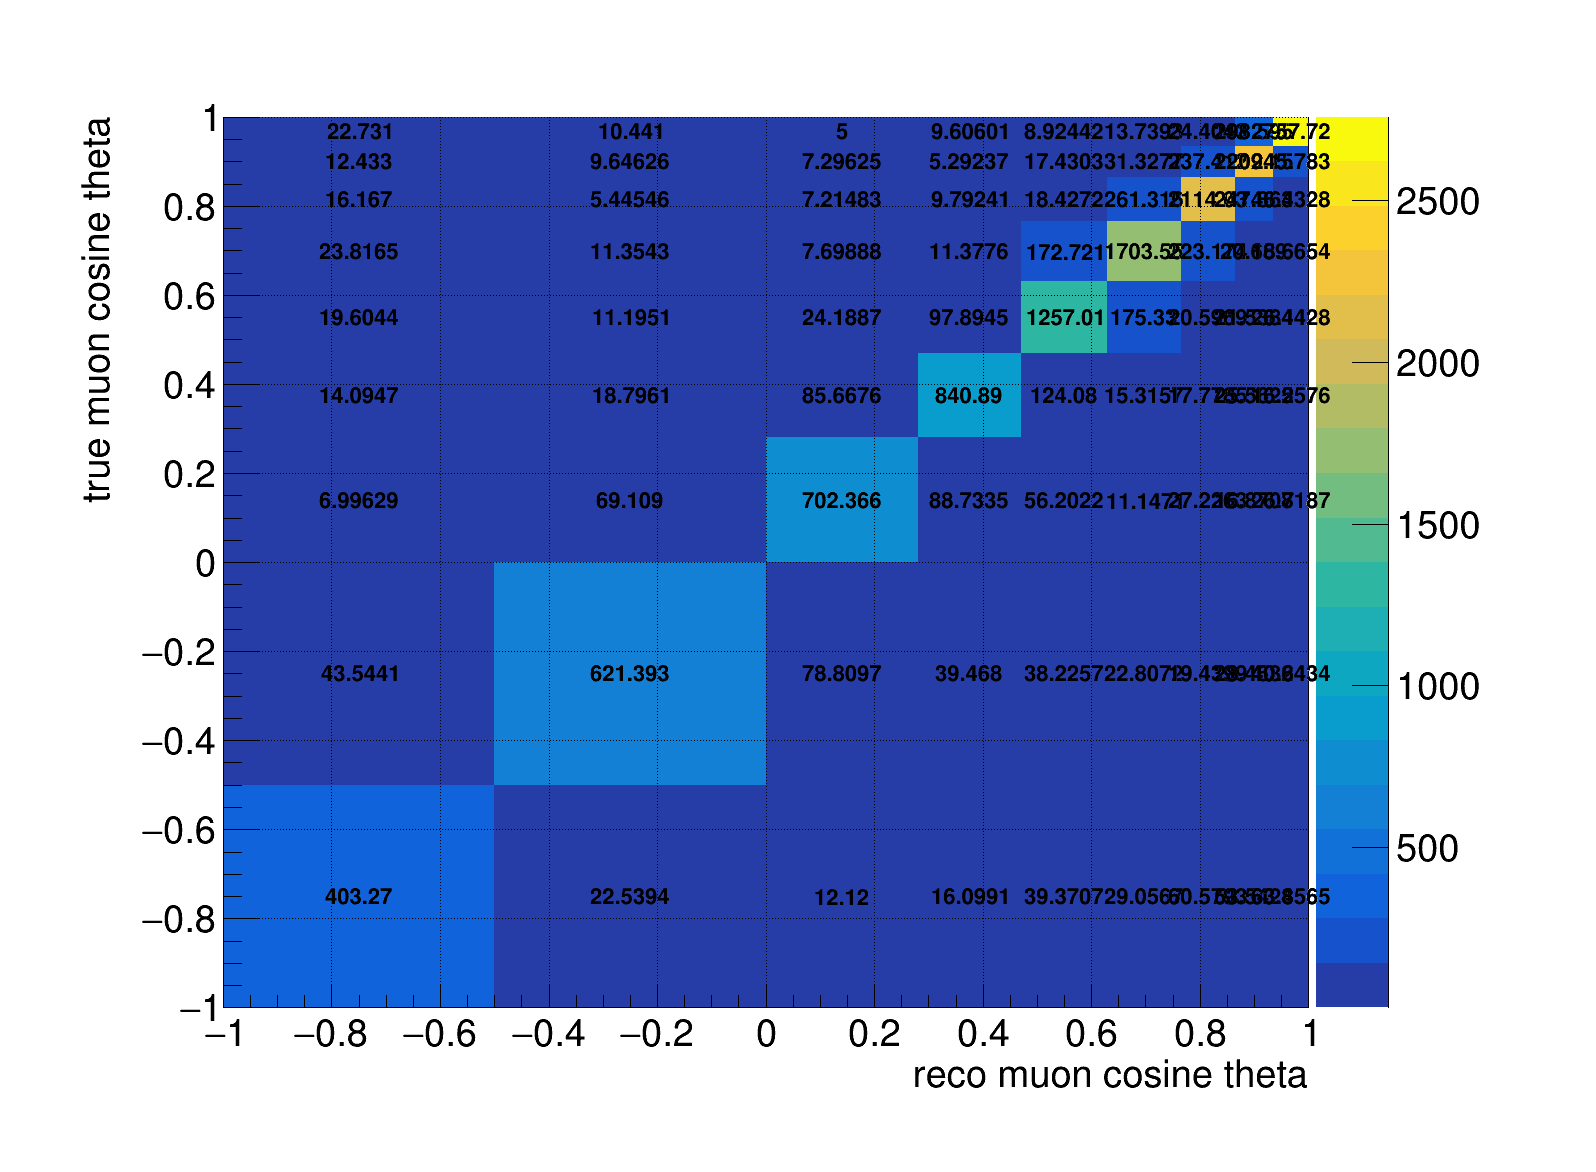

In [38]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&&'+'numu_true'+')','')
h_migration.SetXTitle("reco muon cosine theta")
h_migration.SetYTitle("true muon cosine theta")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(outputdir_pdf + "h2_true_Theta_bin.pdf")
h_migration.Write("h2_true_Theta_bin")

[[0.57574293 0.0466814  0.00695892 0.0121669  0.01185415 0.01086019
  0.00592919 0.0044791  0.00721354]
 [0.03217914 0.666163   0.06873987 0.01622534 0.00676933 0.00517751
  0.0019971  0.00347516 0.00331337]
 [0.0173035  0.08448784 0.69861457 0.07395066 0.01462617 0.00351064
  0.00264601 0.00262855 0.00158672]
 [0.02298453 0.04231156 0.08825949 0.72587975 0.05919374 0.0051881
  0.00359132 0.00190663 0.0030484 ]
 [0.05620905 0.04097976 0.05590196 0.10710926 0.76007279 0.07875951
  0.0067581  0.00627944 0.0028321 ]
 [0.04148384 0.02445037 0.01108758 0.01322091 0.10601683 0.77680648
  0.09583641 0.01128611 0.00436007]
 [0.08648816 0.02084048 0.02708089 0.01534689 0.01245427 0.10176589
  0.77531014 0.08553023 0.00774455]
 [0.07644177 0.03051391 0.01678071 0.02206626 0.01302356 0.00942038
  0.09090273 0.79586879 0.09475723]
 [0.09116708 0.04357167 0.02657602 0.01403403 0.01598916 0.00851129
  0.017029   0.08854598 0.87514402]]


841

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_mitigation_theta_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_mitigation_theta_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_mitigation_theta_matrix.pdf has been created


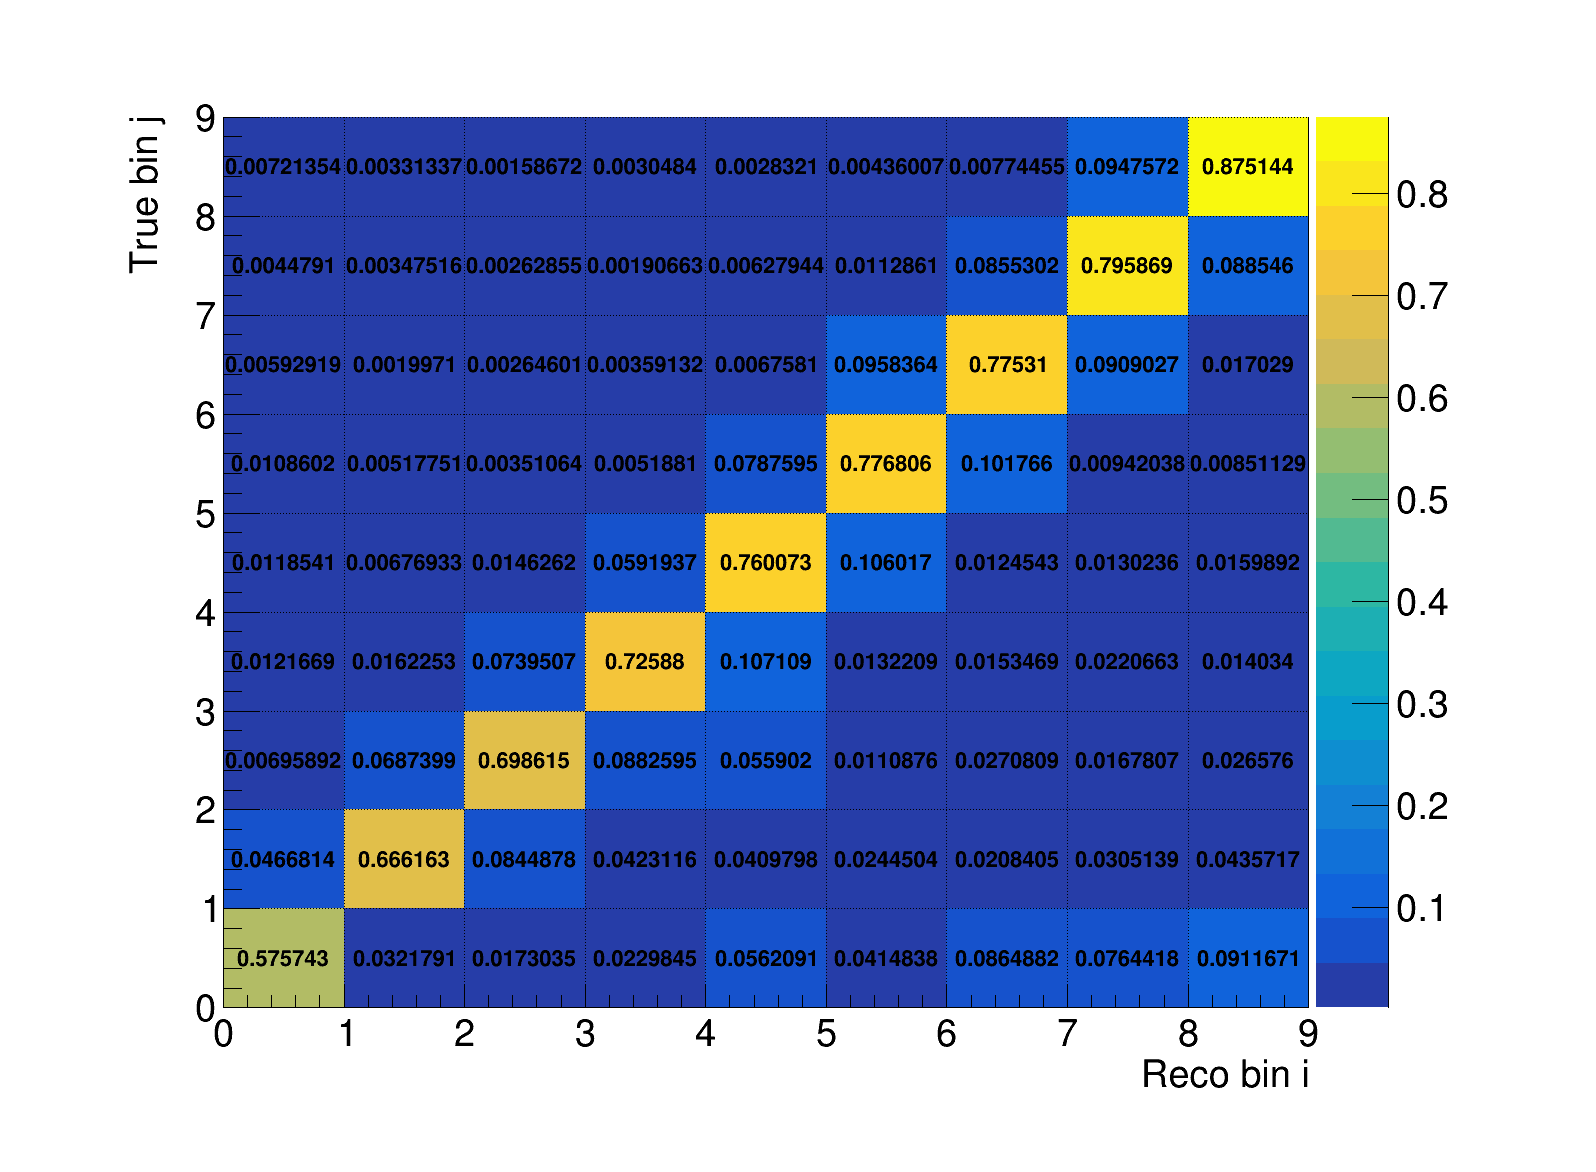

In [39]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(outputdir_png + "h_mitigation_theta_matrix.png")
c1.SaveAs(outputdir_root + "h_mitigation_theta_matrix.root")
c1.SaveAs(outputdir_pdf + "h_mitigation_theta_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_theta_matrix")

In [40]:
# Nselected and N generated
title = 'cosine theta efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = cut+' && '+numu_signal
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

529

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [41]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
Err_sel = np.zeros((9))
Err_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((9))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((9))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_theta_xsec_CV',eff_tilde)


535.0174560546875 1679.2557373046875 0.3186039173005445
747.593505859375 2944.177734375 0.2539226817494008
821.46044921875 2799.08984375 0.29347412733212663
1046.7589111328125 2605.140380859375 0.40180518440526847
1522.8355712890625 3140.75048828125 0.4848635945361014
2092.383544921875 3733.141845703125 0.560488626310898
2635.676025390625 4158.697265625 0.6337744387350869
2704.424560546875 3828.4423828125 0.7064033594153546
3086.218994140625 4425.15771484375 0.6974257626543369
[0.34597211 0.27277586 0.30731764 0.39385727 0.46652972 0.55031278
 0.60792664 0.66568948 0.66121722]
[0.48917017 0.27487001 0.21472556 0.47345113 0.58502095 0.69003278
 0.67819443 0.702207   0.44479004]


In [42]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

0.013098646085635598
0.01243423865723726
0.01936084236330969
0.011819253062804687
0.010415021504526646
0.009328688491752864
0.00959762794093319
0.008257238890302472
0.020339522171395386
[0.00886582 0.01046142 0.01594146 0.01189243 0.01241929 0.01067076
 0.01148167 0.01156136 0.02135687]


518

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_eff_tilde_xsecTheta.pdf has been created


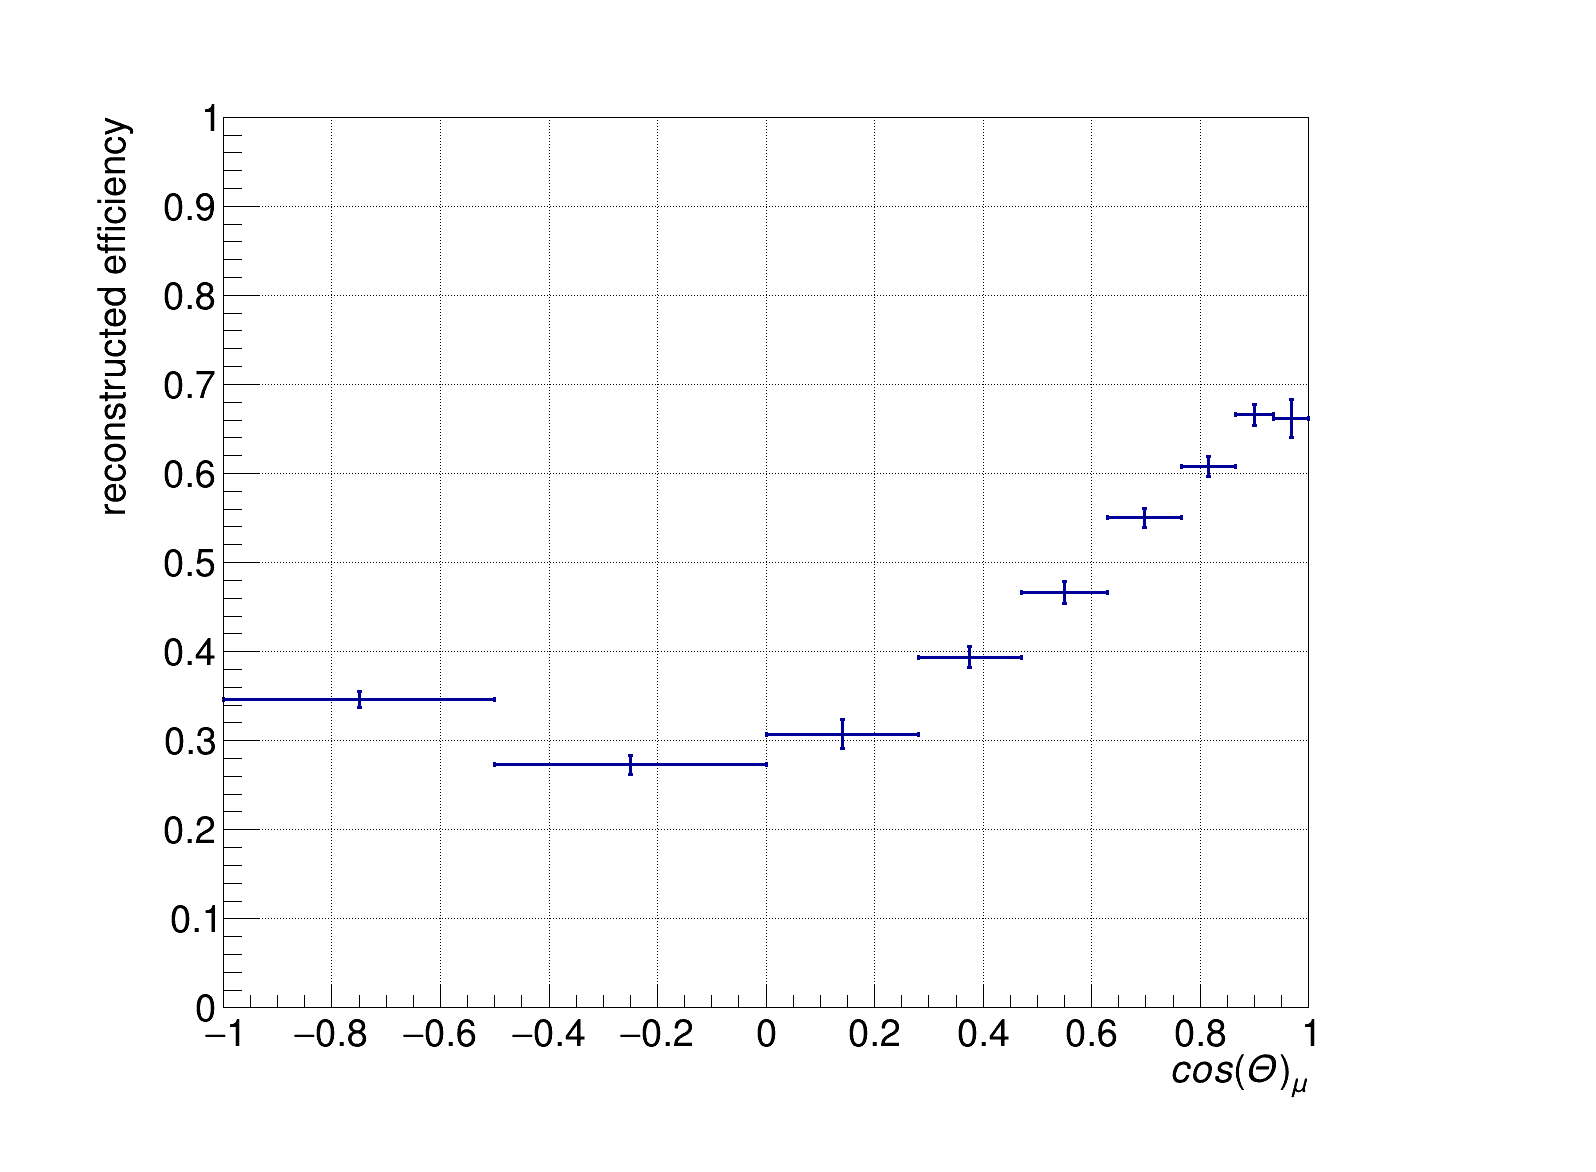

In [43]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.SetXTitle("cos(\Theta)_{\mu}")
h_eff_tilde.SetYTitle("reconstructed efficiency")
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(outputdir_root + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_theta_tilde")

In [44]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

data_out.Draw(variable+'>>h_data',cut,'')
ext_out.Draw(variable+'>>h_ext',cut,'')
dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !'+'numu_signal'+')','')


2822L

Warning in <TFile::Append>: Replacing existing TH1: h_data (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ext (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_dirt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_overlay (Potential memory leak).


In [45]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(scale[data])
h_ext.Scale(scale[ext])
h_dirt.Scale(scale[dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data_theta")
h_ext.Write("h_ext_theta")
h_dirt.Write("h_dirt_theta")
h_overlay.Write("h_overlay_theta")

479

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [46]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

201.313402176
972.377742767


In [47]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [48]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&&'+'numu_signal'+')','')
h_overlay_sig.Scale(scale[overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

Warning in <TFile::Append>: Replacing existing TH1: h_overlay_sig (Potential memory leak).


In [49]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

2.19312738496e-39
3.40706103422e-39
1.10158524084e-38
2.04114833184e-38
3.28564560222e-38
6.3201990602e-38
1.13481578714e-37
2.34348634909e-37
2.65977754906e-37


479

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_CV/pdf/h_xsec_corr_theta.pdf has been created


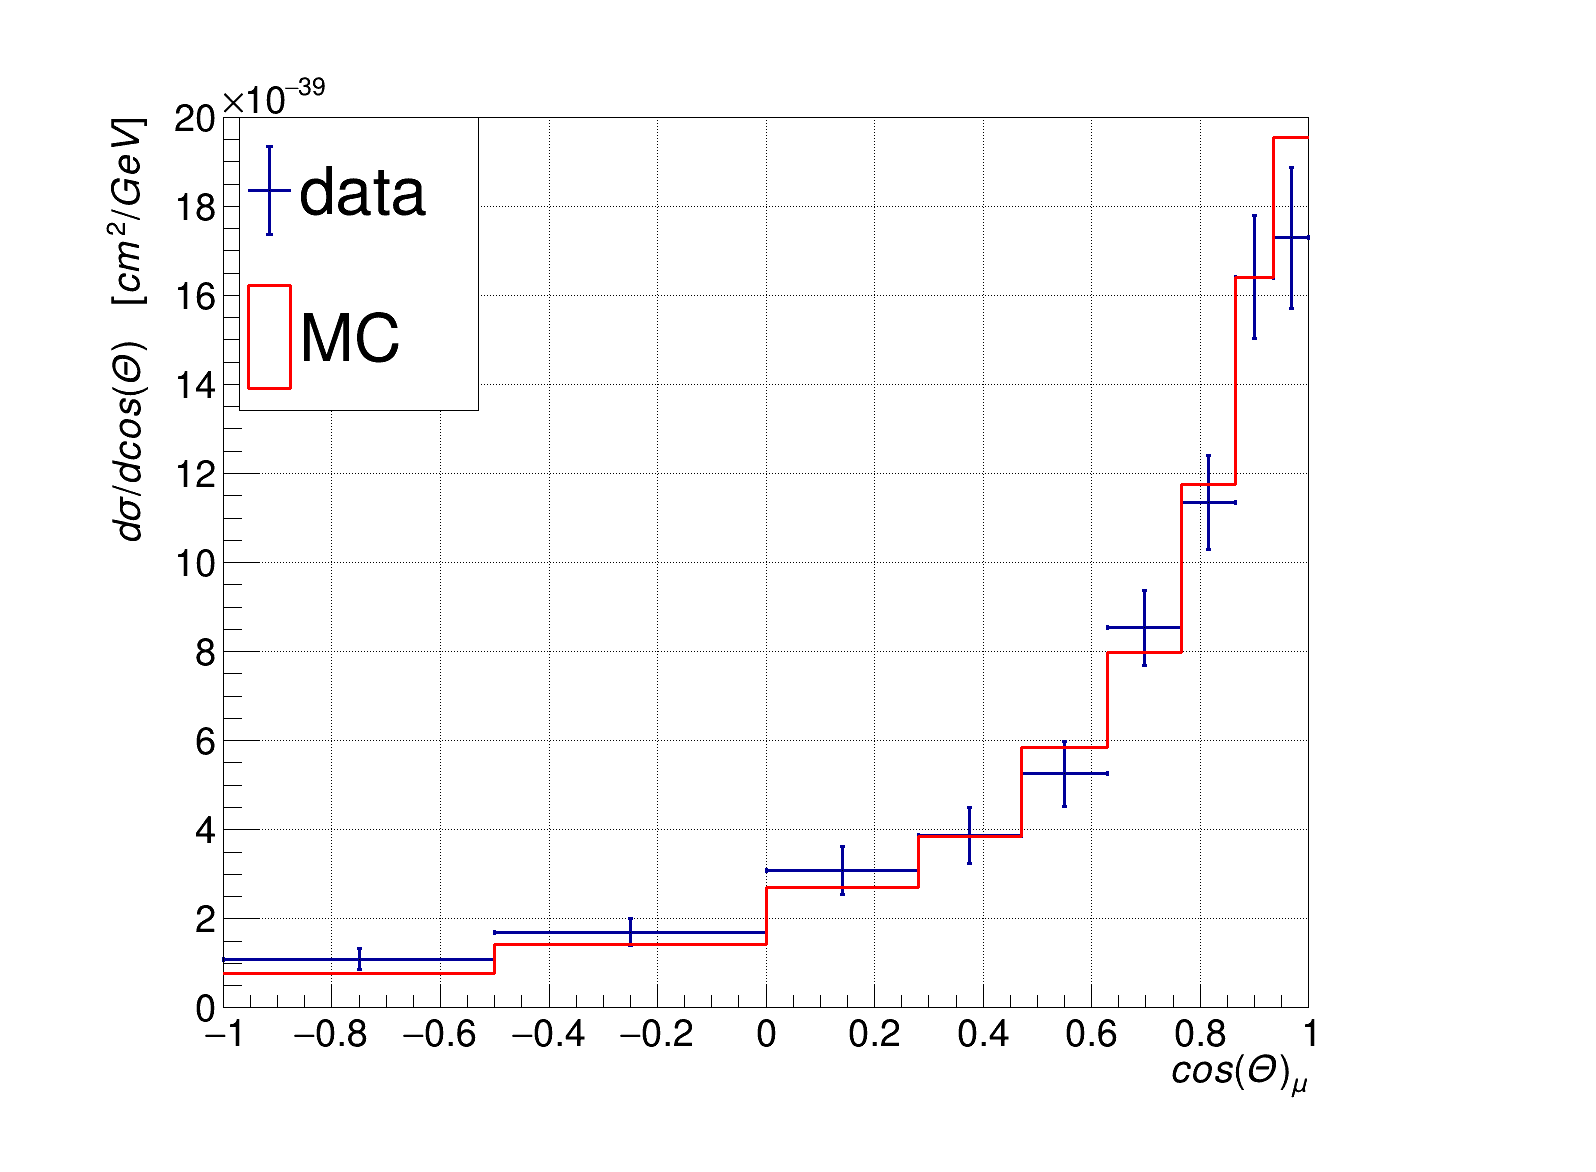

In [50]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9) # rigth
legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # left
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetXTitle("cos(\Theta)_{\mu}")
h_data.SetYTitle("d\sigma / d cos(\Theta) \t [cm^2/GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(20e-39)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [51]:
RootFile.Close()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.
